 **Step 1: Install and Import Libraries**

In [2]:
# Importing essential libraries
import pandas as pd                # For data handling and CSV/Excel file loading
import numpy as np                 # For numerical operations
import matplotlib.pyplot as plt    # For plotting graphs
import seaborn as sns              # For attractive plots
from sklearn.model_selection import train_test_split  # To split data into train/test
from sklearn.linear_model import LinearRegression      # To train a regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation
import joblib                      # For saving/loading trained models


**Step 2: Load the Dataset**

In [3]:
# Load your dataset
df = pd.read_csv("data/Salary Data.csv")

# Preview first few rows
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


 **Step 3: Explore and Understand Data (EDA)**

In [4]:
# Dataset shape
print("Rows, Columns:", df.shape)

# Column info and data types
df.info()

# Descriptive statistics
df.describe()

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Check for duplicates
print("\nTotal Duplicates:", df.duplicated().sum())


Rows, Columns: (375, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB

Missing values per column:
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

Total Duplicates: 50


 **Step 4: Clean the Data**

In [21]:
# Remove duplicates if any
df = df.drop_duplicates()

# Drop rows with missing values
df = df.dropna()

# Confirm cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


 **Step 5: Data Visualization (Understand the Data)**

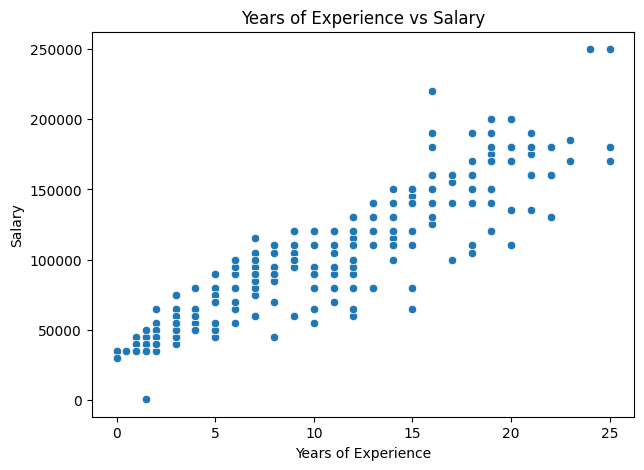

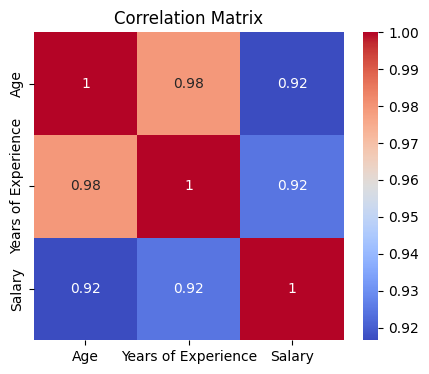

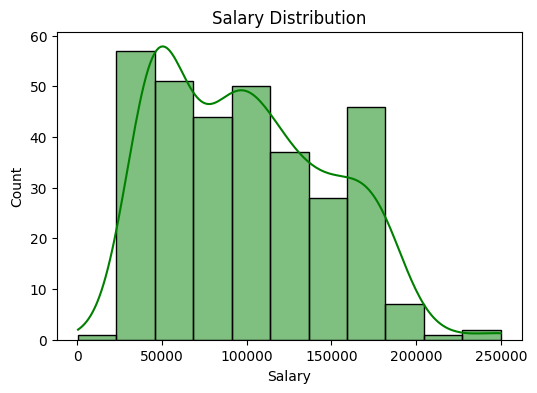

In [22]:
# Scatter plot: Experience vs Salary
plt.figure(figsize=(7,5))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title("Years of Experience vs Salary")
plt.show()

# Correlation heatmap
plt.figure(figsize=(5,4))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of Salary
plt.figure(figsize=(6,4))
sns.histplot(df['Salary'], kde=True, color='green')
plt.title("Salary Distribution")
plt.show()


**Step 6: Feature Selection**

**Step 6.1: Feature Engineering (Encode Categorical Variables)**

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create label encoders for categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Education Level', 'Job Title']

# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Encode categorical variables
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_processed[col] = label_encoders[col].fit_transform(df_processed[col])

# Display unique values for reference
print("Unique values for categorical features:")
for col in categorical_columns:
    unique_values = sorted(df[col].unique())
    print(f"{col}: {unique_values}")

print("\nEncoded dataset:")
df_processed.head()

Unique values for categorical features:
Gender: ['Female', 'Male']
Education Level: ["Bachelor's", "Master's", 'PhD']
Job Title: ['Account Manager', 'Accountant', 'Administrative Assistant', 'Business Analyst', 'Business Development Manager', 'Business Intelligence Analyst', 'CEO', 'Chief Data Officer', 'Chief Technology Officer', 'Content Marketing Manager', 'Copywriter', 'Creative Director', 'Customer Service Manager', 'Customer Service Rep', 'Customer Service Representative', 'Customer Success Manager', 'Customer Success Rep', 'Data Analyst', 'Data Entry Clerk', 'Data Scientist', 'Digital Content Producer', 'Digital Marketing Manager', 'Director', 'Director of Business Development', 'Director of Engineering', 'Director of Finance', 'Director of HR', 'Director of Human Capital', 'Director of Human Resources', 'Director of Marketing', 'Director of Operations', 'Director of Product Management', 'Director of Sales', 'Director of Sales and Marketing', 'Event Coordinator', 'Financial Advi

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [24]:
# Define independent (X) and dependent (y) variables using ALL features
X = df_processed[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]   # All Features
y = df_processed['Salary']              # Target

print("Feature columns:", X.columns.tolist())
print("Dataset shape:", X.shape)

Feature columns: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']
Dataset shape: (324, 5)


**Step 7: Split the Data**

In [25]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (259, 5)
Test set shape: (65, 5)


**Step 8: Train the ML Model**

In [26]:
# Create model
model = LinearRegression()

# Train on scaled training data
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Step 9: Evaluate the Model**

In [27]:
# Predict salaries on scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate R² score (accuracy for regression)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score (Accuracy): {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score (Accuracy): 0.89
RMSE: 14344.13


**Step 10: Save the Trained Model and Accuracy Score**

In [28]:
# Save enhanced model with all components to file
model_data = {
    'model': model,
    'label_encoders': label_encoders,
    'scaler': scaler,
    'feature_names': ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']
}

joblib.dump(model_data, 'salary_predictor.pkl')

# Save accuracy score to text file
with open("model_score.txt", "w") as f:
    f.write(str(r2))

print(f"Enhanced model saved with {len(model_data['feature_names'])} features")
print(f"Features: {model_data['feature_names']}")


Enhanced model saved with 5 features
Features: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']


**Step 11: Plot Actual vs Predicted**

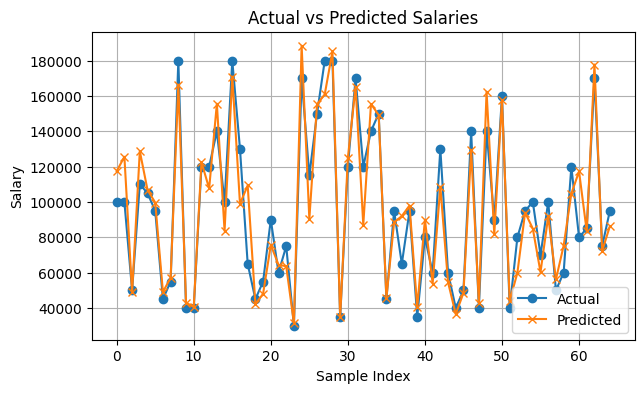

In [29]:
plt.figure(figsize=(7,4))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Salaries")
plt.xlabel("Sample Index")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.show()
